In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Special packages
import statsmodels.api as sm
from patsy import dmatrices
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('fake_job_postings.csv')

UNDERSTANDING CODE/FORMATTING DATASET

In [4]:
df.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [5]:
# Make "job_id the index"
# Fill missing values with 'zz'
df = df.set_index('job_id').fillna('zz')

In [6]:
# make new columns with word count for title, company profile, description, requirements, benefits
df['title'] = df.title.apply(lambda x: len(x.split(" ")))
df['company_profile'] = df.company_profile.apply(lambda x: len(x.split(" ")))
df['description'] = df.description.apply(lambda x: len(x.split(" ")))
df['requirements'] = df.benefits.apply(lambda x: len(x.split(" ")))
df['benefits'] = df.benefits.apply(lambda x: len(x.split(" ")))
df

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
job_id,,,,,,,,,,,,,,,,,
1,2,"US, NY, New York",Marketing,zz,141,124,1,1,0,1,0,Other,Internship,zz,zz,Marketing,0
2,6,"NZ, , Auckland",Success,zz,150,309,225,225,0,1,0,Full-time,Not Applicable,zz,Marketing and Advertising,Customer Service,0
3,4,"US, IA, Wever",zz,zz,136,50,1,1,0,1,0,zz,zz,zz,zz,zz,0
4,5,"US, DC, Washington",Sales,zz,85,345,96,96,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
5,3,"US, FL, Fort Worth",zz,zz,205,182,3,3,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17876,5,"CA, ON, Toronto",Sales,zz,283,227,161,161,0,1,1,Full-time,Mid-Senior level,zz,Computer Software,Sales,0
17877,2,"US, PA, Philadelphia",Accounting,zz,330,155,52,52,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17878,11,"US, TX, Houston",zz,zz,32,167,1,1,0,0,0,Full-time,zz,zz,zz,zz,0


In [7]:
# Replace all zz's with -1
df['department'] = df['department'].str.replace('zz','-1')
df['salary_range'] = df['salary_range'].str.replace('zz','-1')
df['employment_type'] = df['employment_type'].str.replace('zz','-1')
df['required_experience'] = df['required_experience'].str.replace('zz','-1')
df['required_education'] = df['required_education'].str.replace('zz','-1')
df['industry'] = df['industry'].str.replace('zz','-1')
df['function'] = df['function'].str.replace('zz','-1')

df[:30]

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
job_id,,,,,,,,,,,,,,,,,
1,2,"US, NY, New York",Marketing,-1,141,124,1,1,0,1,0,Other,Internship,-1,-1,Marketing,0
2,6,"NZ, , Auckland",Success,-1,150,309,225,225,0,1,0,Full-time,Not Applicable,-1,Marketing and Advertising,Customer Service,0
3,4,"US, IA, Wever",-1,-1,136,50,1,1,0,1,0,-1,-1,-1,-1,-1,0
4,5,"US, DC, Washington",Sales,-1,85,345,96,96,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
5,3,"US, FL, Fort Worth",-1,-1,205,182,3,3,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
6,2,"US, MD,",-1,-1,1,480,1,1,0,0,0,-1,-1,-1,-1,-1,0
7,4,"DE, BE, Berlin",ANDROIDPIT,20000-28000,120,56,64,64,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
8,7,"US, CA, San Francisco",-1,-1,153,386,97,97,0,1,1,-1,-1,-1,-1,-1,0
9,3,"US, FL, Pensacola",-1,-1,192,5,1,1,0,1,1,Full-time,Associate,-1,Information Technology and Services,-1,0


In [8]:
# change all "1's in length columns to -1"
df['company_profile'] = df['company_profile'].replace(to_replace=1,value=-1)
df['description'] = df['description'].replace(to_replace=1,value=-1)
df['benefits'] = df['benefits'].replace(to_replace=1,value=-1)
df['requirements'] = df['requirements'].replace(to_replace=1,value=-1)

df

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
job_id,,,,,,,,,,,,,,,,,
1,2,"US, NY, New York",Marketing,-1,141,124,-1,-1,0,1,0,Other,Internship,-1,-1,Marketing,0
2,6,"NZ, , Auckland",Success,-1,150,309,225,225,0,1,0,Full-time,Not Applicable,-1,Marketing and Advertising,Customer Service,0
3,4,"US, IA, Wever",-1,-1,136,50,-1,-1,0,1,0,-1,-1,-1,-1,-1,0
4,5,"US, DC, Washington",Sales,-1,85,345,96,96,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
5,3,"US, FL, Fort Worth",-1,-1,205,182,3,3,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17876,5,"CA, ON, Toronto",Sales,-1,283,227,161,161,0,1,1,Full-time,Mid-Senior level,-1,Computer Software,Sales,0
17877,2,"US, PA, Philadelphia",Accounting,-1,330,155,52,52,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17878,11,"US, TX, Houston",-1,-1,32,167,-1,-1,0,0,0,Full-time,-1,-1,-1,-1,0


In [9]:
company_profile_percentile = pd.qcut(df['company_profile'].rank(method = 'first'), 
                           4, 
                           labels = ['0-25', '25-50', '50-75', '75-100'])

df['company profile percentiles'] = company_profile_percentile

In [10]:
df

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,company profile percentiles
job_id,,,,,,,,,,,,,,,,,,
1,2,"US, NY, New York",Marketing,-1,141,124,-1,-1,0,1,0,Other,Internship,-1,-1,Marketing,0,75-100
2,6,"NZ, , Auckland",Success,-1,150,309,225,225,0,1,0,Full-time,Not Applicable,-1,Marketing and Advertising,Customer Service,0,75-100
3,4,"US, IA, Wever",-1,-1,136,50,-1,-1,0,1,0,-1,-1,-1,-1,-1,0,75-100
4,5,"US, DC, Washington",Sales,-1,85,345,96,96,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,50-75
5,3,"US, FL, Fort Worth",-1,-1,205,182,3,3,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,75-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17876,5,"CA, ON, Toronto",Sales,-1,283,227,161,161,0,1,1,Full-time,Mid-Senior level,-1,Computer Software,Sales,0,75-100
17877,2,"US, PA, Philadelphia",Accounting,-1,330,155,52,52,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,75-100
17878,11,"US, TX, Houston",-1,-1,32,167,-1,-1,0,0,0,Full-time,-1,-1,-1,-1,0,25-50


In [11]:
df = df.transpose()

In [12]:
# get count of missing values in row
numeric = df.isin([-1]).sum(axis=0)
string = df.isin(['-1']).sum(axis=0)
total = numeric + string
total


job_id
1        5
2        2
3        9
4        1
5        2
        ..
17876    2
17877    1
17878    8
17879    3
17880    4
Length: 17880, dtype: int64

In [13]:
df = df.transpose()
# Add column "missing_values" to df
df['missing_values'] = total


In [14]:
df[:30]

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,company profile percentiles,missing_values
job_id,,,,,,,,,,,,,,,,,,,
1,2,"US, NY, New York",Marketing,-1,141,124,-1,-1,0,1,0,Other,Internship,-1,-1,Marketing,0,75-100,5
2,6,"NZ, , Auckland",Success,-1,150,309,225,225,0,1,0,Full-time,Not Applicable,-1,Marketing and Advertising,Customer Service,0,75-100,2
3,4,"US, IA, Wever",-1,-1,136,50,-1,-1,0,1,0,-1,-1,-1,-1,-1,0,75-100,9
4,5,"US, DC, Washington",Sales,-1,85,345,96,96,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,50-75,1
5,3,"US, FL, Fort Worth",-1,-1,205,182,3,3,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,75-100,2
6,2,"US, MD,",-1,-1,-1,480,-1,-1,0,0,0,-1,-1,-1,-1,-1,0,0-25,10
7,4,"DE, BE, Berlin",ANDROIDPIT,20000-28000,120,56,64,64,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0,50-75,0
8,7,"US, CA, San Francisco",-1,-1,153,386,97,97,0,1,1,-1,-1,-1,-1,-1,0,75-100,7
9,3,"US, FL, Pensacola",-1,-1,192,5,-1,-1,0,1,1,Full-time,Associate,-1,Information Technology and Services,-1,0,75-100,6


In [15]:
df['location'] = df['location'].apply(lambda x: x.split()[0])
df['location'] = df['location'].str.replace(',',' ')
df

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,company profile percentiles,missing_values
job_id,,,,,,,,,,,,,,,,,,,
1,2,US,Marketing,-1,141,124,-1,-1,0,1,0,Other,Internship,-1,-1,Marketing,0,75-100,5
2,6,NZ,Success,-1,150,309,225,225,0,1,0,Full-time,Not Applicable,-1,Marketing and Advertising,Customer Service,0,75-100,2
3,4,US,-1,-1,136,50,-1,-1,0,1,0,-1,-1,-1,-1,-1,0,75-100,9
4,5,US,Sales,-1,85,345,96,96,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,50-75,1
5,3,US,-1,-1,205,182,3,3,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,75-100,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17876,5,CA,Sales,-1,283,227,161,161,0,1,1,Full-time,Mid-Senior level,-1,Computer Software,Sales,0,75-100,2
17877,2,US,Accounting,-1,330,155,52,52,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,75-100,1
17878,11,US,-1,-1,32,167,-1,-1,0,0,0,Full-time,-1,-1,-1,-1,0,25-50,8


# TESTS

In [16]:
df.columns.values

array(['title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions',
       'employment_type', 'required_experience', 'required_education',
       'industry', 'function', 'fraudulent',
       'company profile percentiles', 'missing_values'], dtype=object)

In [17]:
df.iloc[0]

title                                   2
location                              US 
department                      Marketing
salary_range                           -1
company_profile                       141
description                           124
requirements                           -1
benefits                               -1
telecommuting                           0
has_company_logo                        1
has_questions                           0
employment_type                     Other
required_experience            Internship
required_education                     -1
industry                               -1
function                        Marketing
fraudulent                              0
company profile percentiles        75-100
missing_values                          5
Name: 1, dtype: object

Text(0, 0.5, 'number of job postings')

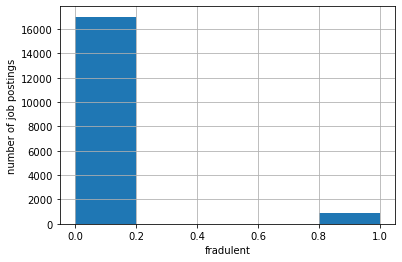

In [18]:
df['fraudulent'].hist(bins=5)
xlabel('fradulent')
ylabel('number of job postings')

^ Within our data, this is a plot of real job listings, verse fake job listings. With 17,014 being real and 866 being fake.

In [19]:
print(df['fraudulent'].median())

0.0


In [20]:
# Create a traget where frauds > 0 are positive and fraud = 0 are negative
df['target'] = 0.0
df['target'][df['fraudulent'] > 0] = 1.0
df['target'].value_counts()

0.0    17014
1.0      866
Name: target, dtype: int64

In [21]:
# Create design matrices
formula = 'target ~ 0 + title + C(location) + C(department) + salary_range' + \
            '+ company_profile + description + requirements + benefits' +\
            '+ C(telecommuting) + C(has_company_logo) + C(has_questions)' +\
            '+ employment_type + required_experience + required_education' +\
            '+ industry + function + missing_values'
    

In [22]:
Y, X = dmatrices(formula, df, return_type='dataframe')
y = Y['target'].values

In [23]:
missing_values_vs_target = pd.crosstab(df['missing_values'], df['target'])
missing_values_vs_target
#missing_values_vs_target.plot(kind='bar')

target,0.0,1.0
missing_values,,
0,699,71
1,2133,99
2,2791,87
3,2095,71
4,2929,69
5,1352,64
6,1248,66
7,1413,121
8,1015,97


In [24]:
# normalize
total_postings = missing_values_vs_target.apply(sum)
total_postings

target
0.0    17014
1.0      866
dtype: int64

In [25]:
missing_values_vs_target /= total_postings
missing_values_vs_target

target,0.0,1.0
missing_values,,
0,0.041084,0.081986
1,0.125367,0.114319
2,0.164041,0.100462
3,0.123134,0.081986
4,0.172152,0.079677
5,0.079464,0.073903
6,0.073351,0.076212
7,0.083049,0.139723
8,0.059657,0.112009


<AxesSubplot:xlabel='missing_values'>

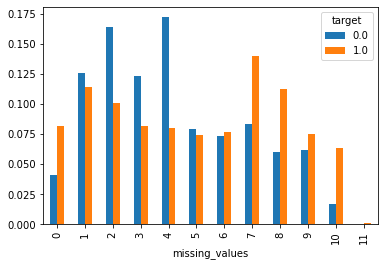

In [26]:
missing_values_vs_target.plot(kind='bar')

^ Job listings with 6 or more missing features seem to have a higher chance of being a fake job listing. However, there is more fake job listings with no missing values than real job listings---need to look into this

# LOGISITIC REGRESSION

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
# Fit the classifier
model = LogisticRegression(random_state=42,solver='saga')
result = model.fit(X_train, y_train)

In [29]:
from sklearn import metrics
prediction_train = model.predict(X_train)
print(metrics.accuracy_score(y_train, prediction_train))

0.9837807606263982


In [30]:
# Accuracy on test set
prediction = model.predict(X_test)
print(metrics.accuracy_score(y_test, prediction))

0.9752050708426547


In [31]:
# y_train is 0 or 1
print('Number of positive examples =', len(y_train[y_train==1]))
print('Number of negative examples =', len(y_train[y_train==0]))

Number of positive examples = 595
Number of negative examples = 11921


In [32]:
negative_examples_in_test = len(y_test[y_test==0])
total_examples_in_test = len(y_test)

print('Number of examples where baseline is correct=', negative_examples_in_test)
print('Baseline accuracy=', negative_examples_in_test * 1.0/ total_examples_in_test)

Number of examples where baseline is correct= 5093
Baseline accuracy= 0.9494780014914244


In [33]:
# future weights
model.coef_

array([[-0.01672045, -0.47945486, -0.25648292, ..., -0.08860524,
        -0.59237514, -0.00382836]])

In [34]:
# And the model intercept
model.intercept_

array([-2.05401044])

In [35]:
# Put coefficients in a Series indexed by the feature names
weights = Series(model.coef_[0],
                index=X.columns.values)
# Top 20 features that seem to indicate a real job listing
weights.sort_values()[:20]

company_profile[T.32]              -3.688766
company_profile[T.86]              -2.883069
C(has_company_logo)[T.1]           -2.700292
function[T.Health Care Provider]   -2.045626
company_profile[T.136]             -1.952789
C(location)[T.GR ]                 -1.808893
industry[T.Internet]               -1.780367
required_experience[T.Associate]   -1.587711
industry[T.Computer Software]      -1.561953
company_profile[T.184]             -1.529351
industry[T.Restaurants]            -1.437201
industry[T.Education Management]   -1.313713
C(department)[T.Operations]        -1.252211
employment_type[T.Temporary]       -1.140295
company_profile[T.191]             -1.118135
C(location)[T.GB ]                 -1.067176
company_profile[T.77]              -1.020191
company_profile[T.131]             -1.019948
company_profile[T.194]             -1.001049
C(department)[T.IT]                -0.988501
dtype: float64

^It looks like job listings that have a logo, are in the health care provider function, belong to the internet, restaurant, education management or computer software industry seem to result as a real job listing.

In [36]:
# Top 20 features that seem to indicate a fake job listing
weights.sort_values()[-20:]

C(department)[T.Information Technology]     1.556848
description[T.112]                          1.687165
company_profile[T.99]                       1.692294
company_profile[T.183]                      1.989152
description[T.532]                          2.026253
company_profile[T.95]                       2.114288
company_profile[T.54]                       2.153079
C(location)[T.AU ]                          2.155036
company_profile[T.168]                      2.169144
C(department)[T.Oil & Energy]               2.223995
company_profile[T.219]                      2.296704
company_profile[T.49]                       2.406243
company_profile[T.120]                      2.440261
C(department)[T.Information Technology ]    2.461353
company_profile[T.106]                      2.574808
C(location)[T.MY ]                          2.714517
company_profile[T.60]                       2.942927
industry[T.Oil & Energy]                    2.965434
company_profile[T.114]                      2.

^ Job listings in the industry of oil & energy and accounting or with departments in oil & energy or information technology  or jobs located in MY or AU or jobs that categorize as administrative function or department tend to be fake job listings.

# DECISION TREES

In [37]:
df.columns.values

array(['title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions',
       'employment_type', 'required_experience', 'required_education',
       'industry', 'function', 'fraudulent',
       'company profile percentiles', 'missing_values', 'target'],
      dtype=object)

In [38]:
# Number of job listings
len(df)

17880

In [39]:
# first one
df.iloc[0] # -1 indicates that info was missing

title                                   2
location                              US 
department                      Marketing
salary_range                           -1
company_profile                       141
description                           124
requirements                           -1
benefits                               -1
telecommuting                           0
has_company_logo                        1
has_questions                           0
employment_type                     Other
required_experience            Internship
required_education                     -1
industry                               -1
function                        Marketing
fraudulent                              0
company profile percentiles        75-100
missing_values                          5
target                                0.0
Name: 1, dtype: object

In [40]:
# Create a traget where frauds > 0 are positive and fraud = 0 are negative
df['target'] = 0.0
df['target'][df['fraudulent'] > 0] = 1.0
df['target'].value_counts()

0.0    17014
1.0      866
Name: target, dtype: int64

In [41]:
# Create design matrices
formula = 'target ~ 0 + title + C(location) + C(department) + salary_range' + \
            '+ company_profile + description + requirements + benefits' +\
            '+ C(telecommuting) + C(has_company_logo) + C(has_questions)' +\
            '+ employment_type + required_experience + required_education' +\
            '+ industry + function + missing_values'

In [42]:
Y, X = dmatrices(formula, df, return_type='dataframe')
y = Y['target'].values

In [43]:
X[:5]

,title[1],title[2],title[3],title[4],title[5],title[6],title[7],title[8],title[9],title[10],...,function[T.Purchasing],function[T.Quality Assurance],function[T.Research],function[T.Sales],function[T.Science],function[T.Strategy/Planning],function[T.Supply Chain],function[T.Training],function[T.Writing/Editing],missing_values
job_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [44]:
# Set up classifier
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy')

In [45]:
# Fit the data
result = model.fit(X_train, y_train)

In [46]:
from sklearn import metrics

prediction_train = model.predict(X_train)
print(metrics.accuracy_score(y_train, prediction_train))

1.0


In [47]:
# Accuracy on test set
prediction = model.predict(X_test)
print(metrics.accuracy_score(y_test, prediction))

0.9737136465324385


^ The tree may be overfitting a bit since it did a little worse on the test set compared to the training set

In [48]:
# Use max_depth to account for overfitting
model2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)
result = model2.fit(X_train, y_train)

In [49]:
# Accuracy
prediction_train = model2.predict(X_train)
print(metrics.accuracy_score(y_train, prediction_train))

0.979226589964845


In [50]:
prediction = model2.predict(X_test)
print(metrics.accuracy_score(y_test, prediction))

0.9688665175242357


^ These values involved a bit of "guess work" because they're based on max_depth. I orginally started at a max_depth of 5, but it was in the 0.94-0.95 range, as I increased max_depth this value increased. However, we are seeing that the test set does better than the training set.

##### unable to install graphviz :(